<a href="https://colab.research.google.com/github/karishita/Linear-Regression-from-scratch/blob/main/LinearRegressionfromscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression from Scratch (OLS & Gradient Descent)

This notebook implements Linear Regression **from scratch** using two methods:

- **Ordinary Least Squares (OLS)** — the analytical closed-form solution
- **Gradient Descent (GD)** — an iterative optimization approach

 The **California Housing dataset** from Scikit-learn will be used to evaluate the  models and compare with Scikit-learn's built-in `LinearRegression`.


##   Import Libraries and Load Dataset


In [54]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
df_train=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [5]:
df_test=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [6]:
X_train=df_train.iloc[:,0:df_train.shape[1]-1]
y_train=df_train.iloc[:,-1]
X_test=df_test.iloc[:,0:df_train.shape[1]-1]
y_test=df_test.iloc[:,-1]

##   Feature Scaling


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  Linear Regression Class (OLS + GD)

In this step, I implemented a custom `LinearRegression` class with support for two methods:

### 1. **Ordinary Least Squares (OLS)**
- This uses the **Equation**:  
  $$
  \beta = (X^T X)^{-1} X^T y
  $$
  
- If the matrix $(X^T X)$ is **non-invertible** (singular), directly computing the inverse will fail.
- So I used the **Moore-Penrose Pseudoinverse**, which always exists
  *(Note: I used `np.linalg.pinv()` internally which handles this automatically.)*

### 2. **Gradient Descent (GD)**
- I implemented **Batch Gradient Descent**, where:
  - All training examples are used to compute the gradient at every step.
  - This ensures smooth convergence, though it can be slow on large datasets.
- Weight updates are based on the derivative of **Mean Squared Error (MSE)** loss:
  $$
  \text{Loss} = \frac{1}{n} \sum (y - \hat{y})^2
  $$
  
- The learning rate (`lr`) and number of epochs (`epoch`) are tunable.

### Loss Tracking
- During Gradient Descent, I also stored the **MSE loss** at each epoch to visualize convergence.


In [55]:
class MyLR:
  def __init__(self,method='ols',learning_rate=0.01,epoch=100):
    self.coef=None
    self.intercept=None
    self.method=method
    self.lr=learning_rate
    self.epoch=epoch



    #OLS implementation
  def train_ols(self,X_train,y_train):
    X_train_1=np.insert(X_train,0,1,axis=1)
    betas=np.dot(np.dot(np.linalg.pinv(np.dot(X_train_1.T,X_train_1)),X_train_1.T),y_train)
    self.coef=betas[1:]
    self.intercept=betas[0]
    print("Coefficient",self.coef)
    print("offset",self.intercept)

    #gradient descent implementation
  def train_gradientdescent(self,X_train,y_train):
    self.intercept=0
    self.coef=np.ones(X_train.shape[1])
    self.losses=[]

    for i in range(self.epoch):
      y_hat=np.dot(X_train,self.coef)+self.intercept

      #compute loss
      loss = np.mean((y_train - y_hat) ** 2)
      self.losses.append(loss)

      #compute gradients and update weights and offset
      slope_i=-2*np.mean(y_train-y_hat)
      self.intercept=self.intercept-(self.lr*slope_i)
      slope_c=-2*np.dot((y_train-y_hat).T,X_train)/X_train.shape[0]
      self.coef=self.coef-(self.lr*slope_c)

    print("Coefficient",self.coef)
    print("offset",self.intercept)

    # Plot loss vs. epoch
    plt.plot(range(self.epoch), self.losses)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title("Loss vs Epochs (Gradient Descent)")
    plt.grid(True)
    plt.show()

  def train(self,X_train,y_train):
      if isinstance(X_train, (pd.DataFrame, pd.Series)):
        X_train = X_train.values
      if isinstance(y_train, (pd.DataFrame, pd.Series)):
        y_train = y_train.values

      if self.method=='ols':
        self.train_ols(X_train,y_train)
      else:
        self.train_gradientdescent(X_train,y_train)




  def predict(self,X_test):
    if isinstance(X_test, (pd.DataFrame, pd.Series)):
      X_test=X_test.values
    y_pred=np.dot(X_test,self.coef)+self.intercept
    return y_pred


##  Train and Evaluate the Models


In [56]:
#OLS
lr1=MyLR(method='ols')

In [57]:
lr1.train(X_train_scaled,y_train)

Coefficient [-86499.60728226 -91744.05083061  14483.29860201 -18263.60700749
  49587.33777166 -44178.15153005  17470.57604338  77291.55314914]
offset 207300.9123529408


In [58]:
y_pred=lr1.predict(X_test_scaled)

In [60]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))
r2_adj=1-(((1-r2_score(y_test,y_pred))*(X_test.shape[0]-1))/(X_test.shape[0]-1-X_train.shape[1]))
print("Adjusted R2", r2_adj)

MAE 50352.228257942916
MSE 4867205486.928865
RMSE 69765.36022216803
R2 score 0.6195057678311999
Adjusted R2 0.6184880634322196


In [73]:
#Gradient Descent
lr2=MyLR(method='gradientdescent',learning_rate=0.01,epoch=2000)

Coefficient [-79115.91171172 -84482.61266411  15184.26658865 -17890.02661434
  38215.03093036 -45447.14054491  29873.73621753  77782.88279511]
offset 207300.91235294


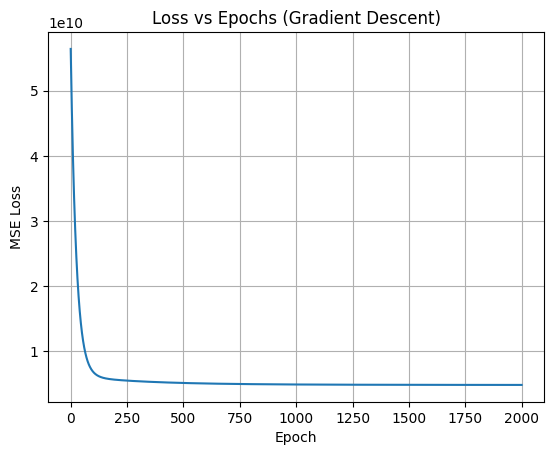

In [74]:
lr2.train(X_train_scaled,y_train)

In [75]:
y_pred=lr2.predict(X_test_scaled)

In [76]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))
r2_adj=1-(((1-r2_score(y_test,y_pred))*(X_test.shape[0]-1))/(X_test.shape[0]-1-X_train.shape[1]))
print("Adjusted R2", r2_adj)

MAE 50292.5640912389
MSE 4871123333.1758175
RMSE 69793.43330984526
R2 score 0.6191994898440691
Adjusted R2 0.618180966246193


## Comparing with Scikit-learn's LinearRegression


In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression();
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [16]:
y_pred=lr.predict(X_test_scaled)

In [17]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))
r2_adj=1-(((1-r2_score(y_test,y_pred))*(X_test.shape[0]-1))/(X_test.shape[0]-1-X_train.shape[1]))
print("Adjusted R2", r2_adj)

MAE 50352.228257942894
MSE 4867205486.928867
RMSE 69765.36022216805
R2 score 0.6195057678311999
Adjusted R2 0.6184880634322196


##  Summary

| Method              | R² Score |
|---------------------|----------|
| Custom OLS          | 0.6195057678311999   |
| Custom Gradient Descent(learning rate=0.01,epochs=2000) | 0.6191994898440691   |
| scikit-learn    | 0.6195057678311999   |

